### 3~5일전 발주 및 계획 발주 수량을 활용하여 재고관리 최적화를 위한 발주량 예측 모델을 설계한다

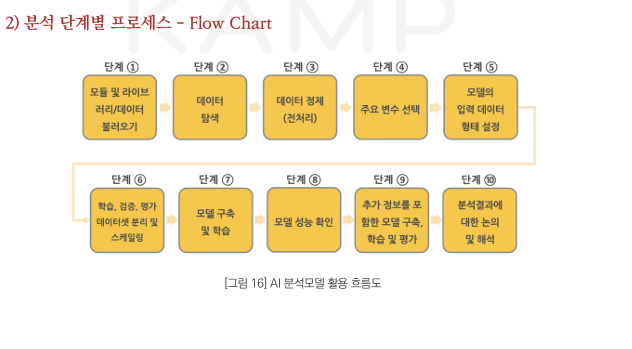

## 라이브러리 / 데이터 불러오기
### 패키지 설치

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display  ##learer display of pandas tables upon printing
import warnings
warnings.filterwarnings('ignore')

In [2]:
## 한글폰트 설정
import sys
from matplotlib import font_manager, rc

if sys.platform == 'darwin':
    ##MAC OS의 이름을 확인한다
    path = '/Library/Fonts/AppleGothic.ttf'
elif sys.platform == 'win32':
    ## Windows 이름을 확인한다
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~')

font_name = font_manager.FontProperties(fname=path).get_name() ##폰트가 있는지를 확인한다
rc('font', family=font_name)
## 한글 폰트를 시각화 환경에 세팅한다.
plt.rcParams['axes.unicode_minus'] = False
## 한글 처리시 마이너스 값을 처리할 수 있도록 조정한다

In [3]:
%pip install xlrd
# 엑셀 읽어오기

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\학생\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# 제조데이터 읽어오기
df = pd.read_excel("./data/data.xlsx", engine="openpyxl")

In [5]:
df

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
1,Part 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
2,Part 2,139,60,80,76,68,81,68,44,0,...,0,0,0,0,0,0,0,0,0,202109131830
3,Part 3,15,11,17,13,12,16,12,8,0,...,0,0,0,0,0,0,0,0,0,202109131830
4,Part 4,40,27,29,17,18,29,18,9,0,...,0,0,0,0,0,0,0,0,0,202109131830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,Part 105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202111010703
17360,Part 112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202111010703
17361,Part 106,141,51,69,55,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202111010703
17362,Part 107,104,33,46,46,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202111010703


### 데이터살펴보기

In [6]:
df.head(3)

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
1,Part 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
2,Part 2,139,60,80,76,68,81,68,44,0,...,0,0,0,0,0,0,0,0,0,202109131830


In [7]:
df.tail(3)

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
17361,Part 106,141,51,69,55,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202111010703
17362,Part 107,104,33,46,46,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202111010703
17363,Part 108,0,5,1,0,0,0,0,0,0,...,0,16,28,0,0,0,0,0,0,202111010703


In [8]:
df.dtypes

Part Number                 object
D일06~08(08)H 투입계획(발주) 수량     int64
D일08~10(10)H 투입계획(발주) 수량     int64
D일10~12(13)H 투입계획(발주) 수량     int64
D일13~15(15)H 투입계획(발주) 수량     int64
                             ...  
D+28일 투입예정 수량                int64
D+29일 투입예정 수량                int64
D+30일 투입예정 수량                int64
D+31~D+45일 투입예정 수량           int64
CRET_TIME                    int64
Length: 84, dtype: object

In [9]:
# 데이터의 형상 확인
df.shape

(17364, 84)

In [10]:
# 데이터의 열과 자료형 확인
df.info

<bound method DataFrame.info of       Part Number  D일06~08(08)H 투입계획(발주) 수량  D일08~10(10)H 투입계획(발주) 수량  \
0          Part 0                         0                         0   
1          Part 1                         0                         0   
2          Part 2                       139                        60   
3          Part 3                        15                        11   
4          Part 4                        40                        27   
...           ...                       ...                       ...   
17359    Part 105                         0                         0   
17360    Part 112                         0                         0   
17361    Part 106                       141                        51   
17362    Part 107                       104                        33   
17363    Part 108                         0                         5   

       D일10~12(13)H 투입계획(발주) 수량  D일13~15(15)H 투입계획(발주) 수량  \
0                             

## 데이터 탐색

In [11]:
#데이터프레임의 결측값 확인 isna(), isnull()
df.isna()

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# 결측치 구하기
df.isna().sum()

Part Number                 0
D일06~08(08)H 투입계획(발주) 수량    0
D일08~10(10)H 투입계획(발주) 수량    0
D일10~12(13)H 투입계획(발주) 수량    0
D일13~15(15)H 투입계획(발주) 수량    0
                           ..
D+28일 투입예정 수량               0
D+29일 투입예정 수량               0
D+30일 투입예정 수량               0
D+31~D+45일 투입예정 수량          0
CRET_TIME                   0
Length: 84, dtype: int64

In [13]:
# 결측치의 총값
df.isna().sum().sum()

0

In [14]:
df.head()

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
1,Part 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
2,Part 2,139,60,80,76,68,81,68,44,0,...,0,0,0,0,0,0,0,0,0,202109131830
3,Part 3,15,11,17,13,12,16,12,8,0,...,0,0,0,0,0,0,0,0,0,202109131830
4,Part 4,40,27,29,17,18,29,18,9,0,...,0,0,0,0,0,0,0,0,0,202109131830


In [15]:
# 기초 통계 확인(24페이지)
# 부품 94 데이터의 기초 통계를 확인한다
df_94 = df[df['Part Number'] == 'Part 94']


In [16]:
df_94

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
96,Part 94,14,8,4,0,0,0,8,8,0,...,0,0,0,0,0,0,0,0,0,202109131830
208,Part 94,14,8,4,0,0,0,8,8,0,...,0,0,0,0,0,0,0,0,0,202109140605
320,Part 94,13,7,4,0,0,0,9,7,0,...,0,0,0,0,0,0,0,0,0,202109140625
433,Part 94,13,7,4,0,0,0,9,7,0,...,0,0,0,0,0,0,0,0,0,202109140634
546,Part 94,13,7,4,0,0,0,9,7,0,...,0,0,0,0,0,0,0,0,0,202109141730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,Part 94,16,4,5,4,4,5,4,3,0,...,0,0,0,0,0,0,0,0,0,202110291234
17015,Part 94,16,4,5,4,4,5,4,3,0,...,0,0,0,0,0,0,0,0,0,202110291503
17127,Part 94,16,4,5,4,4,5,4,3,0,...,0,0,0,0,0,0,0,0,0,202110291538
17239,Part 94,16,4,5,4,4,5,4,3,0,...,0,0,0,0,0,0,0,0,0,202110300704


In [17]:
df_95 = df[df['Part Number'] == 'Part 95']

In [18]:
df_95

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
97,Part 95,50,16,10,0,0,0,20,17,0,...,0,0,0,0,0,0,0,0,0,202109131830
209,Part 95,50,16,10,0,0,0,20,17,0,...,0,0,0,0,0,0,0,0,0,202109140605
321,Part 95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109140625
434,Part 95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109140634
547,Part 95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109141730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,Part 95,66,28,34,21,28,37,28,22,0,...,0,6,0,0,0,0,0,0,0,202110291234
17016,Part 95,66,28,34,21,28,37,28,22,0,...,0,6,0,0,0,0,0,0,0,202110291503
17128,Part 95,66,28,34,21,28,37,28,22,0,...,0,6,0,0,0,0,0,0,0,202110291538
17240,Part 95,66,28,34,21,28,37,28,22,0,...,0,6,0,0,0,0,0,0,0,202110300704


In [19]:
# index 넘버 리셋
df_94.reset_index(drop=True, inplace=True)
df_95.reset_index(drop=True, inplace=True)

In [20]:
df_94.describe()

,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,D일 04~06H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.0,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.0,1.530000e+02
mean,12.686275,3.372549,3.960784,3.254902,3.254902,3.797386,3.444444,2.411765,0.0,0.0,...,3.738562,3.477124,3.712418,1.457516,1.267974,1.294118,0.941176,0.0,0.0,2.021098e+11
std,6.156373,1.609521,1.669708,1.519736,1.519736,1.836614,1.681513,1.388531,0.0,0.0,...,10.032035,9.946624,10.168109,5.663813,5.878156,5.997678,4.318314,0.0,0.0,4.601011e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021091e+11
25%,9.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021093e+11
50%,14.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021101e+11
75%,18.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021102e+11
max,21.000000,8.000000,5.000000,4.000000,4.000000,5.000000,9.000000,8.000000,0.0,0.0,...,34.000000,34.000000,34.000000,32.000000,30.000000,30.000000,21.000000,0.0,0.0,2.021110e+11


In [21]:
df_95.describe()

,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,D일 04~06H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
count,153.000000,153.000000,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.0,153.0,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.0,153.0,153.0,1.530000e+02
mean,63.294118,27.568627,36.196078,30.54902,27.529412,34.790850,27.411765,21.202614,0.0,0.0,...,11.712418,18.954248,4.235294,15.509804,5.477124,0.0,0.0,0.0,0.0,2.021098e+11
std,22.536778,9.677541,12.638735,11.14140,10.199367,12.132304,10.173837,8.554284,0.0,0.0,...,51.819356,40.735078,15.479938,52.492370,26.882563,0.0,0.0,0.0,0.0,4.601011e+05
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.021091e+11
25%,60.000000,26.000000,34.000000,30.00000,23.000000,32.000000,26.000000,18.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.021093e+11
50%,68.000000,32.000000,41.000000,35.00000,32.000000,37.000000,29.000000,23.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.021101e+11
75%,76.000000,34.000000,44.000000,37.00000,34.000000,43.000000,35.000000,27.000000,0.0,0.0,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.021102e+11
max,90.000000,38.000000,48.000000,41.00000,38.000000,49.000000,37.000000,31.000000,0.0,0.0,...,293.000000,124.000000,130.000000,265.000000,150.000000,0.0,0.0,0.0,0.0,2.021110e+11


In [22]:
#df_94의 열 이름만
df_94.columns.to_list()

['Part Number',
 'D일06~08(08)H 투입계획(발주) 수량',
 'D일08~10(10)H 투입계획(발주) 수량',
 'D일10~12(13)H 투입계획(발주) 수량',
 'D일13~15(15)H 투입계획(발주) 수량',
 'D일15~17(18)H 투입계획(발주) 수량',
 'D일18~20(21)H 투입계획(발주) 수량',
 'D일21~23(23)H 투입계획(발주) 수량',
 'D일23~01(02)H 투입계획(발주) 수량',
 'D일 02~04H 투입계획 수량',
 'D일 04~06H 투입계획 수량',
 'D일 투입예정 수량(D일계획)',
 'D+1일 투입예정 수량(D+1일)',
 'D+1일 투입예정 수량(D+1일).1',
 'D+1일 투입예정 수량(D+1일).2',
 'D+1일 투입예정 수량(D+1일).3',
 'D+1일 투입예정 수량(D+1일).4',
 'D+1일 투입예정 수량(D+1일).5',
 'D+1일 투입예정 수량(D+1일).6',
 'D+1일 투입예정 수량(D+1일).7',
 'D+1일 투입예정 수량(D+1일).8',
 'D+1일 투입예정 수량(D+1일).9',
 'D+1일 투입예정 수량(Total)',
 'D+2일 투입예정 수량(과부족수량)',
 'D+2일 투입예정 수량(과부족수량).1',
 'D+2일 투입예정 수량(과부족수량).2',
 'D+2일 투입예정 수량(과부족수량).3',
 'D+2일 투입예정 수량(과부족수량).4',
 'D+2일 투입예정 수량(과부족수량).5',
 'D+2일 투입예정 수량(과부족수량).6',
 'D+2일 투입예정 수량(과부족수량).7',
 'D+2일 투입예정 수량(과부족수량).8',
 'D+2일 투입예정 수량(과부족수량).9',
 'D+2일 투입예정 수량(Total)',
 'D+3일 투입예정 수량(과부족수량)',
 'D+3일 투입예정 수량(과부족수량).1',
 'D+3일 투입예정 수량(과부족수량).2',
 'D+3일 투입예정 수량(과부족수량).3',
 'D+3일 투입예정 수량(과부족수량).4',
 'D+3

### 데이터 시각화

Text(0, 0.5, '투입 예정 수량')

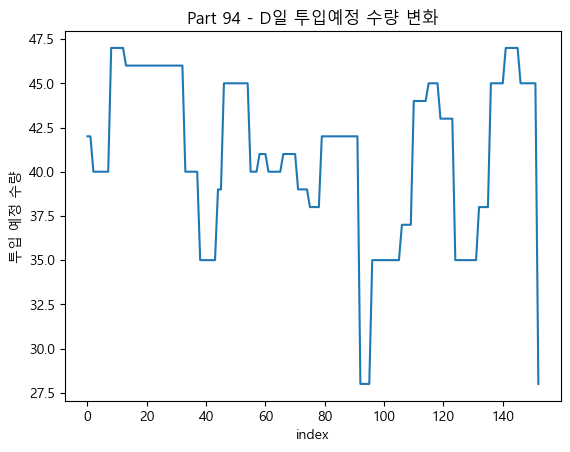

In [23]:
plt.plot(df_94[['D일 투입예정 수량(D일계획)']])
plt.title('Part 94 - D일 투입예정 수량 변화')
plt.xlabel('index')
plt.ylabel('투입 예정 수량')

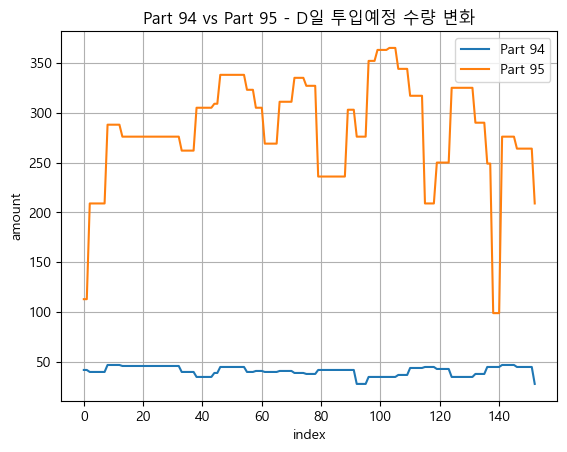

In [24]:
# Part 94, Part 95 의 투입예정 수량 변동 보여줌 , 두가지 비교
plt.plot(df_94['D일 투입예정 수량(D일계획)'], label='Part 94')
plt.plot(df_95['D일 투입예정 수량(D일계획)'], label='Part 95')

plt.title('Part 94 vs Part 95 - D일 투입예정 수량 변화')
plt.xlabel('index')
plt.ylabel('amount')
plt.legend() # 범례추가
plt.grid(True)
plt.show()

### 데이터 정제(전처리)

In [25]:
# 데이터 정제, 데이터 내부에 NaN으로 표기된 누락 데이터가 있는지 확인
df_94.isna().sum().sum()

0

In [26]:
#불필요한 열 제거 (필요한 열만 남기기
df_94.columns

Index(['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량',
       'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량',
       'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량',
       'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량',
       'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)',
       'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2',
       'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5',
       'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8',
       'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)',
       'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2',
       'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4',
       'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6',
       'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8',
       'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)',
       'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(

In [27]:
# 데이터의의 수집 시간 정보인 'CRET_TIME' 변수를 날짜 시간형으로 변환한다
df_94['CRET_TIME'] = pd.to_datetime(df_94['CRET_TIME'], format="%Y%m%d%H%M")

In [28]:
# df_94['CRET_TIME'] 열에서 존재하는 값의 종류 확인
df_94['CRET_TIME'].unique()

<DatetimeArray>
['2021-09-13 18:30:00', '2021-09-14 06:05:00', '2021-09-14 06:25:00',
 '2021-09-14 06:34:00', '2021-09-14 17:30:00', '2021-09-15 06:20:00',
 '2021-09-15 06:37:00', '2021-09-15 16:33:00', '2021-09-16 06:32:00',
 '2021-09-16 06:38:00',
 ...
 '2021-10-28 15:30:00', '2021-10-28 16:26:00', '2021-10-29 06:30:00',
 '2021-10-29 06:32:00', '2021-10-29 07:06:00', '2021-10-29 12:34:00',
 '2021-10-29 15:03:00', '2021-10-29 15:38:00', '2021-10-30 07:04:00',
 '2021-11-01 07:03:00']
Length: 153, dtype: datetime64[ns]

In [29]:
# 실제로는 매일 가장 마지막 시간의 발주 로그가 해당일의 전체 발주 정보를 담고 있으므로,
# 'groupby()' 메서드를 사용하여 일자를 기준으로 그룹화하고,
# 'last()'메서드를 사용해 가장 늦게 기록된 로그만을 남긴다.

df_94 = df_94.groupby(by=[df_94['CRET_TIME'].dt.year,
                          df_94['CRET_TIME'].dt.month,
                          df_94['CRET_TIME'].dt.day]).last()
df_94

#.dt는 pandas의 날짜 / 시간 (datetime) 속성 접근자
# df_94['CRET_TIME']컬럼이 datetime타입 (예 : 2025-03-22 14:30:00이런 값들)이라면,
# .dt를 이용해서 날짜와 시간의 세부 요소(year, month, day, hour, minute 등)에 바로 접근 할 수 있게 해준다

Part Number  D일06~08(08)H 투입계획(발주) 수량  \
CRET_TIME CRET_TIME CRET_TIME                                         
2021      9         13            Part 94                        14   
                    14            Part 94                        13   
                    15            Part 94                        14   
                    16            Part 94                        21   
                    17            Part 94                        20   
                    18            Part 94                        20   
                    19            Part 94                        20   
                    20            Part 94                        20   
                    21            Part 94                        20   
                    22            Part 94                        20   
                    23            Part 94                        20   
                    24            Part 94                        20   
                    25            Part 94                        20   
                    26            Part 94                        20   
                    27            Part 94                        14   
                    28            Part 94                         9   
                    29            Part 94                        12   
                    30            Part 94                        18   
          10        1             Part 94                        13   
                    2             Part 94                         0   
                    3             Part 94                         0   
                    4             Part 94                        11   
                    5             Part 94                        12   
                    6             Part 94                        10   
                    7             Part 94                         9   
                    8             Part 94                        13   
                    9             Part 94                        13   
                    10            Part 94                        13   
                    11            Part 94                        13   
                    12            Part 94                        13   
                    13            Part 94                        15   
                    14            Part 94                         0   
                    15            Part 94                         0   
                    16            Part 94                         0   
                    17            Part 94                         0   
                    18            Part 94                         8   
                    19            Part 94                        15   
                    20            Part 94                        16   
                    21            Part 94                        14   
                    22            Part 94                         0   
                    23            Part 94                         0   
                    24            Part 94                         0   
                    25            Part 94                         9   
                    26            Part 94                        16   
                    27            Part 94                        16   
                    28            Part 94                        18   
                    29            Part 94                        16   
                    30            Part 94                        16   
          11        1             Part 94                        15   

                               D일08~10(10)H 투입계획(발주) 수량  \
CRET_TIME CRET_TIME CRET_TIME                             
2021      9         13                                8   
                    14                                7   
                    15                                4   
                    16                                4   
                    17                                

In [30]:
df_94.reset_index(drop=True,	inplace=True)
df_94

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 94,14,8,4,0,0,0,8,8,0,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:30:00
1,Part 94,13,7,4,0,0,0,9,7,0,...,0,0,0,0,0,0,0,0,0,2021-09-14 17:30:00
2,Part 94,14,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-15 16:33:00
3,Part 94,21,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-16 17:06:00
4,Part 94,20,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-17 06:32:00
5,Part 94,20,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-18 07:13:00
6,Part 94,20,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-19 06:30:00
7,Part 94,20,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-20 06:29:00
8,Part 94,20,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-21 06:31:00
9,Part 94,20,4,4,4,4,4,4,2,0,...,0,0,0,0,0,0,0,0,0,2021-09-22 06:33:00


## 주요변수 선택
#### 변수별 상관관계 파악을 위핸 데이터 재배열

In [31]:
df_94.columns

Index(['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량',
       'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량',
       'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량',
       'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량',
       'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)',
       'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2',
       'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5',
       'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8',
       'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)',
       'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2',
       'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4',
       'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6',
       'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8',
       'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)',
       'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(

In [32]:
df_94.loc[:, ['CRET_TIME', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(Total)','D+3일 투입예정 수량(Total)','D+4일 투입예정 수량(Total)','D+5일 투입예정 수량','D+6일 투입예정 수량','D+7일 투입예정 수량','D+8일 투입예정 수량','D+9일 투입예정 수량','D+10일 투입예정 수량','D+11일 투입예정 수량','D+12일 투입예정 수량',]]

,CRET_TIME,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
0,2021-09-13 18:30:00,42,32,30,30,30,38,0,30,30,30,30,30,0
1,2021-09-14 17:30:00,40,30,30,30,50,45,30,30,30,30,30,0,0
2,2021-09-15 16:33:00,40,30,30,47,43,51,0,0,0,30,30,0,30
3,2021-09-16 17:06:00,47,30,0,53,42,39,0,0,30,30,0,30,30
4,2021-09-17 06:32:00,46,30,30,44,37,51,0,30,30,0,30,30,30
5,2021-09-18 07:13:00,46,30,30,49,39,40,0,30,30,0,30,30,30
6,2021-09-19 06:30:00,46,30,30,46,52,49,0,30,30,0,30,30,30
7,2021-09-20 06:29:00,46,30,30,40,36,45,0,30,30,0,30,30,30
8,2021-09-21 06:31:00,46,30,30,47,51,37,0,30,30,0,30,30,30
9,2021-09-22 06:33:00,46,30,30,53,35,35,0,30,30,0,30,30,30


In [33]:
# 9월 3일에 대한 발주 수량은 1) 9월 3일의 당일 발주 수량, 2) 9월 2일의 하루 뒤 계획 발주 수량(D+1 투입 예정 수량),
# 3) 9월 1일의 이틀 뒤 계획 발주 수량(D+2 투입 예정 수량)등과 연관된다고 볼 수 있다.

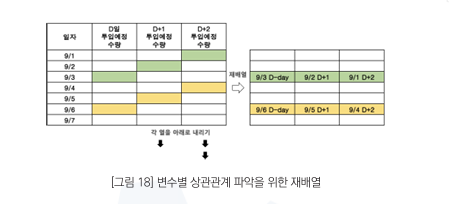

## 변수별 상관관계 파악을 위한 재배열

In [34]:
corr_data_94=pd.concat([
 df_94.iloc[12:, :]['D일 투입예정 수량(D일계획)'].reset_index(drop=True),
 df_94.iloc[11:-1,:]['D+1일 투입예정 수량(Total)'].reset_index(drop=True),
 df_94.iloc[10:-2,:]['D+2일 투입예정 수량(Total)'].reset_index(drop=True),
 df_94.iloc[9:-3,:]['D+3일 투입예정 수량(Total)'].reset_index(drop=True),
 df_94.iloc[8:-4,:]['D+4일 투입예정 수량(Total)'].reset_index(drop=True),
 df_94.iloc[7:-5,:]['D+5일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[6:-6,:]['D+6일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[5:-7,:]['D+7일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[4:-8,:]['D+8일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[3:-9,:]['D+9일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[2:-10,:]['D+10일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[1:-11,:]['D+11일 투입예정 수량'].reset_index(drop=True),
 df_94.iloc[:-12,:]['D+12일 투입예정 수량'].reset_index(drop=True)
 ],
 axis=1)
corr_data_94

#여러 개의 "D일 , D+1일"...관련 컬럼에서 특정 범위의 행만 자라서 좌우로 붙여서 - 한 DataFrame을 만드는 것

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
0,46,30,30,53,51,45,0,30,30,30,30,0,0
1,46,30,30,33,35,37,0,30,30,0,0,0,0
2,40,30,30,38,42,35,0,30,30,0,30,30,30
3,35,30,30,40,36,25,0,30,30,0,30,30,30
4,39,30,30,38,33,33,0,30,30,0,30,30,30
5,45,32,30,30,41,43,0,30,30,0,30,30,30
6,40,32,32,30,30,30,0,30,30,0,30,30,30
7,41,0,0,39,37,48,0,30,30,0,30,30,30
8,41,0,0,47,35,46,0,30,30,0,30,30,30
9,40,0,40,32,32,32,30,30,30,0,30,30,30


In [35]:
# 선정한 13개의 특성간의 표준 상관계수를 corr()메서드를 이용해 자동으로 계산한다.
corr_data_94.corr()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
D일 투입예정 수량(D일계획),1.000000,0.651721,0.408578,0.393761,0.136667,0.388251,0.018768,0.127412,0.246102,0.024242,0.215673,0.103277,0.081598
D+1일 투입예정 수량(Total),0.651721,1.000000,0.567057,0.007026,-0.052853,-0.074226,-0.028867,0.114627,0.345470,0.079831,0.286655,0.184163,0.178313
D+2일 투입예정 수량(Total),0.408578,0.567057,1.000000,0.042953,-0.181014,-0.270177,0.043475,0.270970,0.398243,0.102379,0.376835,0.275252,0.280119
D+3일 투입예정 수량(Total),0.393761,0.007026,0.042953,1.000000,0.210142,0.562022,-0.003860,-0.002500,0.073848,0.098664,0.107248,-0.012449,-0.036512
D+4일 투입예정 수량(Total),0.136667,-0.052853,-0.181014,0.210142,1.000000,0.315161,-0.426723,-0.058878,-0.233603,-0.131155,-0.242849,-0.402762,-0.544969
D+5일 투입예정 수량,0.388251,-0.074226,-0.270177,0.562022,0.315161,1.000000,-0.210461,-0.148368,-0.077522,-0.117067,-0.141054,-0.211434,-0.185081
D+6일 투입예정 수량,0.018768,-0.028867,0.043475,-0.003860,-0.426723,-0.210461,1.000000,0.287892,0.110128,0.509635,0.125197,0.142901,0.247596
D+7일 투입예정 수량,0.127412,0.114627,0.270970,-0.002500,-0.058878,-0.148368,0.287892,1.000000,0.351789,0.296777,0.261273,0.230464,0.036519
D+8일 투입예정 수량,0.246102,0.345470,0.398243,0.073848,-0.233603,-0.077522,0.110128,0.351789,1.000000,0.473771,0.667105,0.555358,0.532574
D+9일 투입예정 수량,0.024242,0.079831,0.102379,0.098664,-0.131155,-0.117067,0.509635,0.296777,0.473771,1.000000,0.479412,0.328968,0.360938


### 데이터 변수 간 상관관계 확인

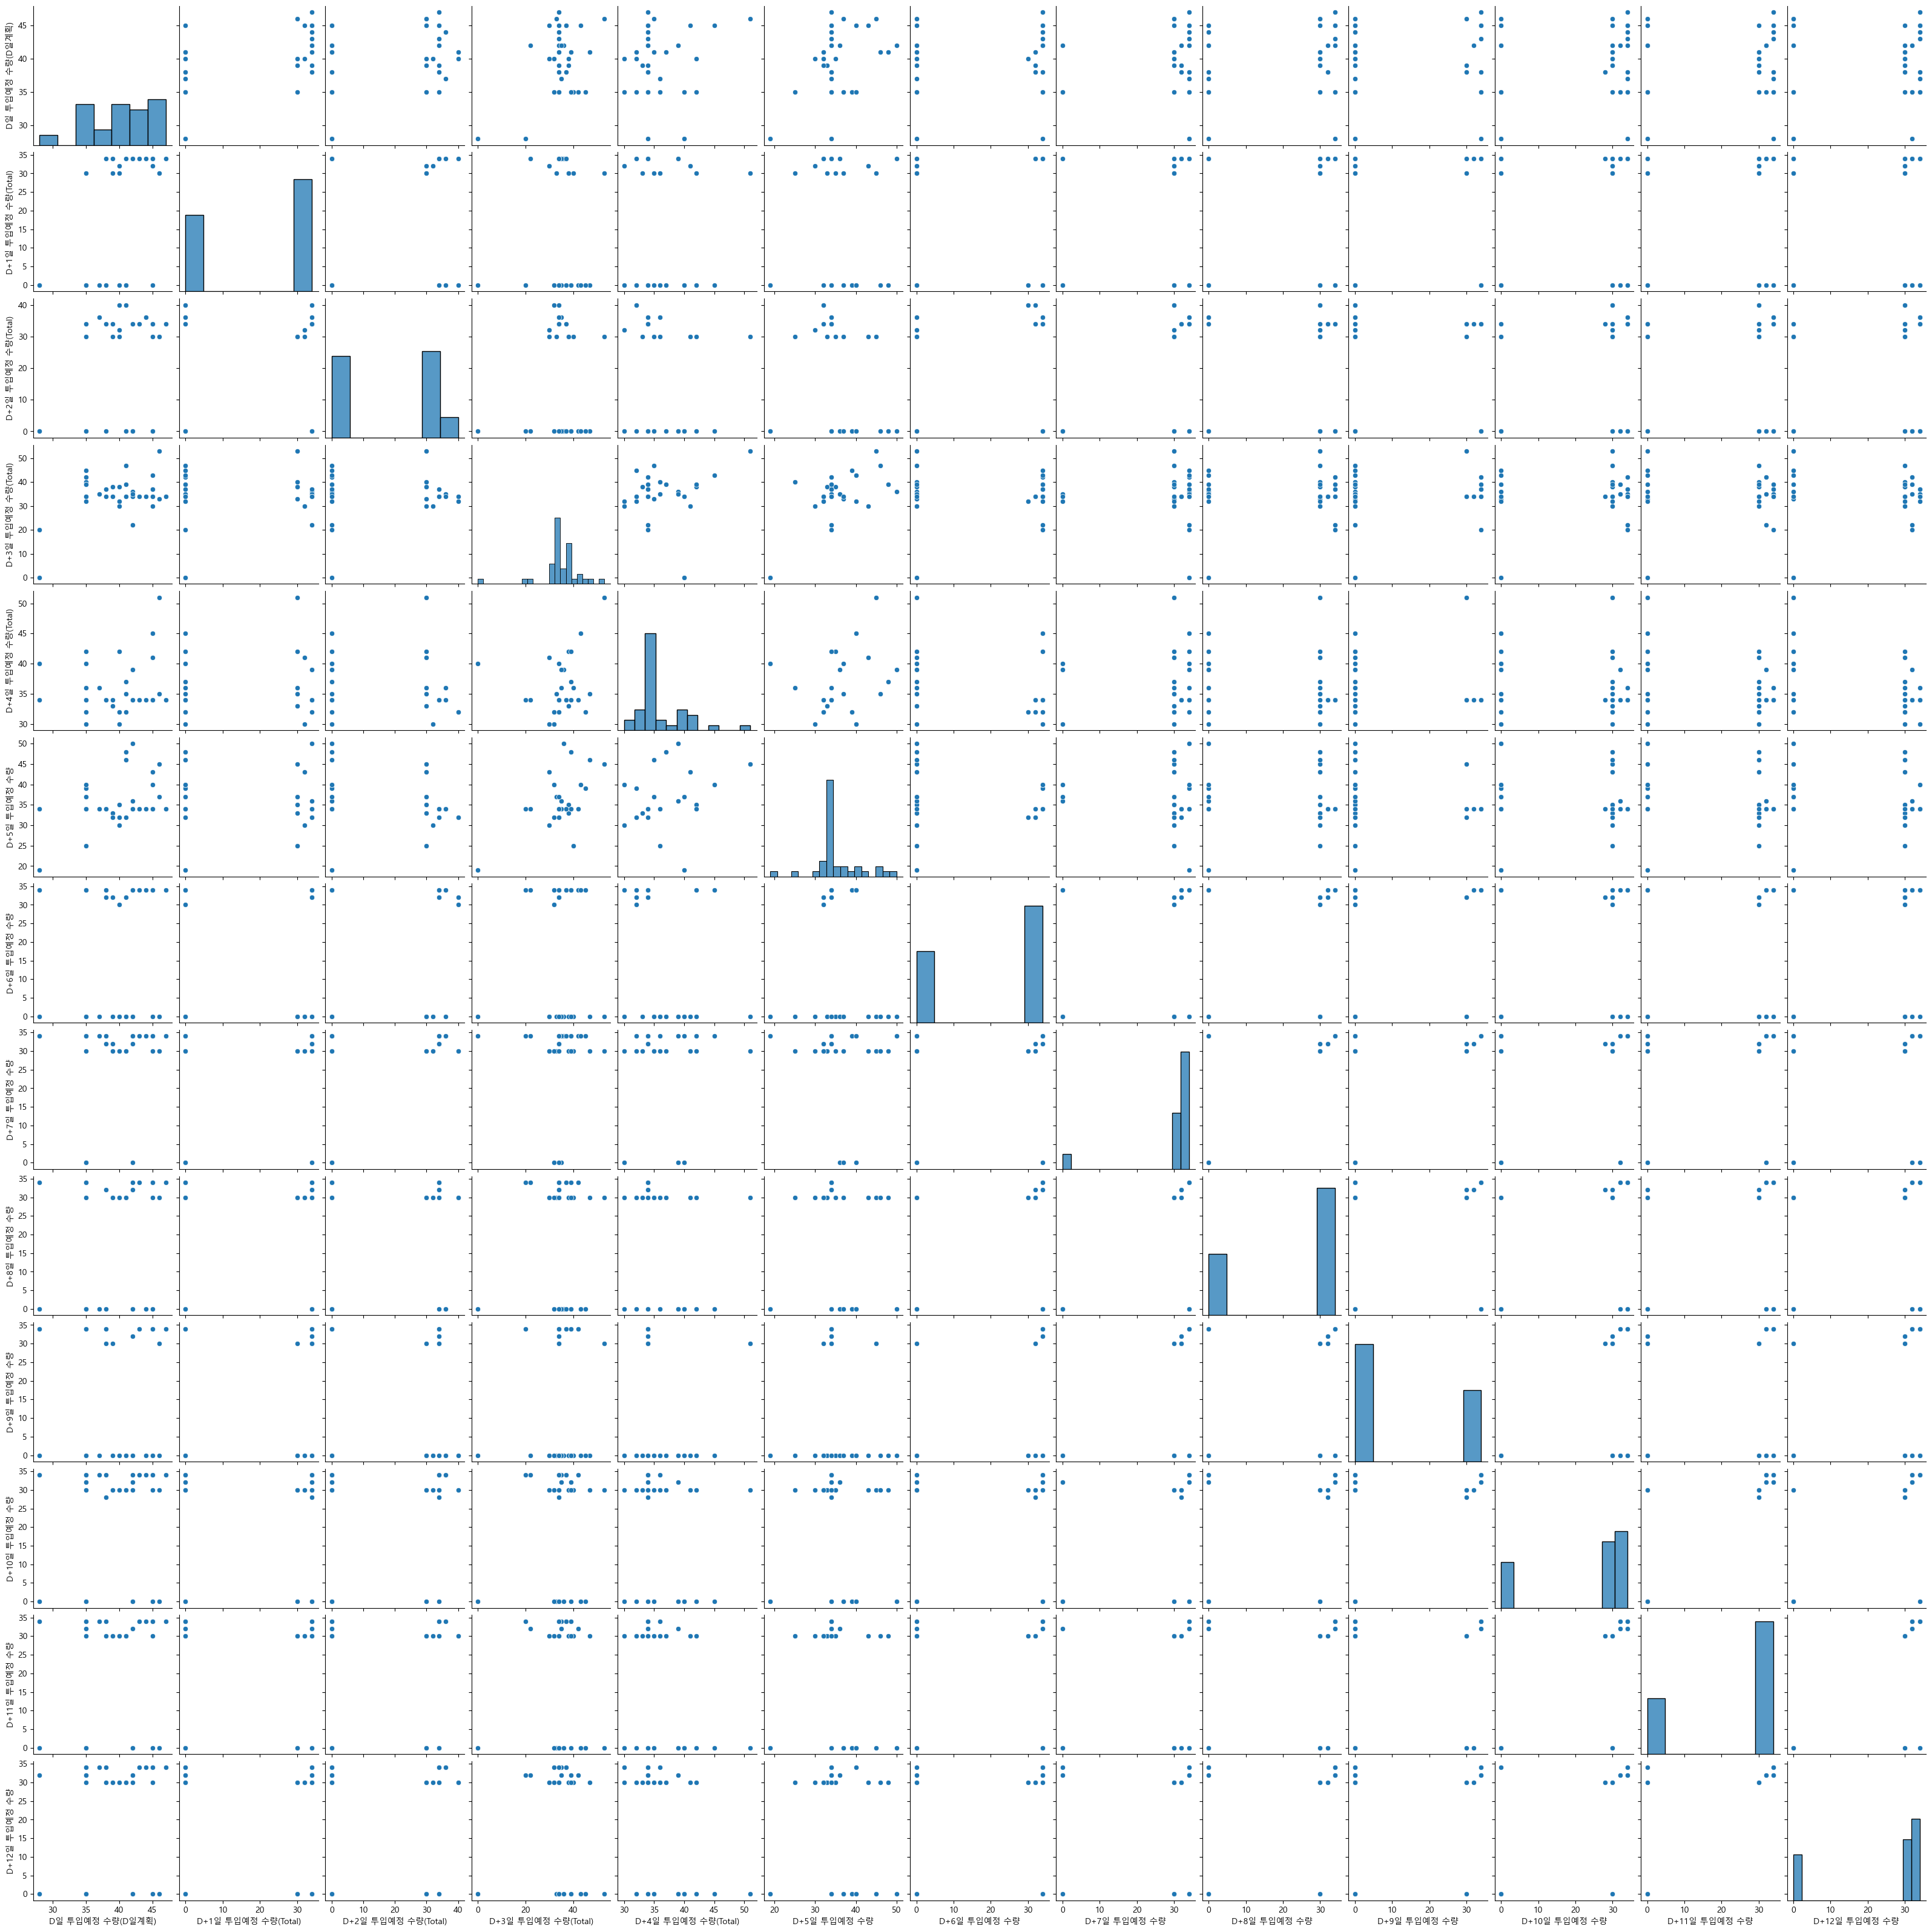

In [36]:
sns.pairplot(corr_data_94)

### 모델의 입력 데이터 형태 설정

In [37]:
# 당일 발주 수량과 가장 유의미한 관계가 있는 변수로 D+3, d+4, D+5의 투입예정 수량을 최종 선택하였고,
# 이를 기반으로 3~5일 전 발주 및 계획 발주 수량을 활용하여 재고관리 최적화를 위한 발주량 예측 모델을 설계한다
# 즉, 해당 변수를 활용하여 학습된 예측 모델은 부품의 발주 수량을 3일 전에 예측 할 수 있게 된다

In [38]:
data_94=df_94.loc[:, ['D일 투입예정 수량(D일계획)','D+3일 투입예정 수량(Total)',
                       'D+4일 투입예정 수량(Total)','D+5일 투입예정 수량']].reset_index(drop=True)
data_94

,D일 투입예정 수량(D일계획),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량
0,42,30,30,38
1,40,30,50,45
2,40,47,43,51
3,47,53,42,39
4,46,44,37,51
5,46,49,39,40
6,46,46,52,49
7,46,40,36,45
8,46,47,51,37
9,46,53,35,35


In [39]:
data_94.to_csv('./data/data_94.csv', index=False, encoding='utf-8-sig')

In [40]:
import numpy as np

# 사용자 정의 함 수 : Tabular 데이터를 시계열 데이터로 변환
def to_timeseries_data(data_94, lookback=3, delay=3):
    #샘플 수 계산
    output_len = len(data_94) - (lookback + delay) + 1 #49-(3+3)+1 = 44 , 44개의 샘플을 만들 수 있음
    
    # feautre 개수 (열 개수)
    n_feature = data_94.shape[-1] #4, 음수 인덱스를 사용하면 뒤에서부터 접근, 마지막 차원의 크기

    # 입력과 타겟 초기화
    inputs = np.zeros((output_len, lookback, n_feature)) # shape: (샘플 수, lookback, feature수),배열을 만든다
    targets = np.zeros((output_len,)) # (샘플 수),

    #데이터 채우기
    for i in range(output_len):
        # lookback만큼 과거 데이터
        inputs[i] = data_94.iloc[i:i+lookback,:].values #데이터 프레임을 array배열로 만든다
        # delay 이후 target값 (첫 번째 열 값 사용)
        targets[i] = data_94.iloc[i+lookback+delay-1,0]

    return inputs, targets



    # data_94 : DataFrame(원본데이터)
    # lookback=3 :  입력으로 사용할 과거 일 수 (default=3)
    # delay: target으로 사용할 미래 일 수 (default=3)

    # inputs[i] = data_94.iloc[i:i+lookback,:] 과거 3일치
    # inputs[i] = i번째부터 i+lookback까지 슬라이싱 -> 3일치 데이터 채워 넣기
    # targets[i]:i+lookback+delay-1 번째 행의 첫 번째 열값 -> 미래 예측 값으로 사용

In [41]:
data_94.shape[-1]

4

In [42]:
# 예시로 df_94에서 일부 열 선택
data_94=df_94.loc[:, ['D일 투입예정 수량(D일계획)','D+3일 투입예정 수량(Total)',
                       'D+4일 투입예정 수량(Total)','D+5일 투입예정 수량']].reset_index(drop=True)

# 함수 적용
X_94, y_94 = to_timeseries_data(data_94, lookback=3, delay=3)

#결과 확인
print("X의 shape", X_94.shape) #(샘플수, 타임스템, 피쳐 수)
print("y의 shape", y_94.shape) #(샘플수)

X의 shape (44, 3, 4)
y의 shape (44,)


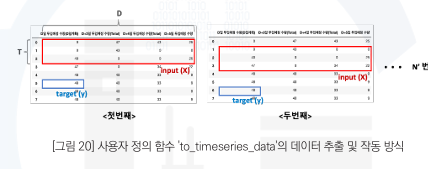

In [43]:
X_94

array([[[42., 30., 30., 38.],
        [40., 30., 50., 45.],
        [40., 47., 43., 51.]],

       [[40., 30., 50., 45.],
        [40., 47., 43., 51.],
        [47., 53., 42., 39.]],

       [[40., 47., 43., 51.],
        [47., 53., 42., 39.],
        [46., 44., 37., 51.]],

       [[47., 53., 42., 39.],
        [46., 44., 37., 51.],
        [46., 49., 39., 40.]],

       [[46., 44., 37., 51.],
        [46., 49., 39., 40.],
        [46., 46., 52., 49.]],

       [[46., 49., 39., 40.],
        [46., 46., 52., 49.],
        [46., 40., 36., 45.]],

       [[46., 46., 52., 49.],
        [46., 40., 36., 45.],
        [46., 47., 51., 37.]],

       [[46., 40., 36., 45.],
        [46., 47., 51., 37.],
        [46., 53., 35., 35.]],

       [[46., 47., 51., 37.],
        [46., 53., 35., 35.],
        [46., 33., 42., 25.]],

       [[46., 53., 35., 35.],
        [46., 33., 42., 25.],
        [46., 38., 36., 33.]],

       [[46., 33., 42., 25.],
        [46., 38., 36., 33.],
        [46., 40., 3

In [44]:
y_94

array([46., 46., 46., 46., 46., 46., 46., 46., 46., 40., 35., 39., 45.,
       40., 41., 41., 40., 41., 39., 38., 42., 42., 42., 42., 42., 28.,
       35., 35., 35., 35., 37., 44., 45., 43., 35., 35., 35., 38., 45.,
       45., 47., 45., 45., 28.])

### 학습, 검증 평가 데이터셋 분리 및 스케일링(scaling)

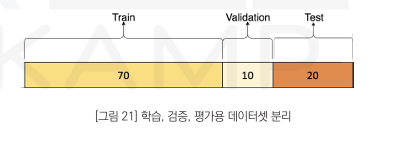

In [45]:
# split예제
X = np.arange(10) #array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#X
train, val, test = np.split(X, [7,8]) #X를 두개의 기준 인덱스([7,8])을 기준으로 3개로 나눈다는 뜻
print(train) # [0 1 2 3 4 5 6] # train -> X[:7]
print(val) # [7] # val -> X[7:8]
print(test) # [8 9] # test -> X[8:]

[0 1 2 3 4 5 6]
[7]
[8 9]


In [46]:
# 데이터셋 분리, train,validation,test = 7:1:2
# 주어진 인덱스 기준으로 [0%~70%], [70%~80%], [80%~100%] 세 구간으로 나눔
X_train_94, X_val_94, X_test_94 = np.split(X_94, [int(0.7*len(X_94)), int(0.8*len(X_94))])
y_train_94, y_val_94, y_test_94 = np.split(y_94, [int(0.7*len(y_94)), int(0.8*len(y_94))])

# 분리 이후 데이터 형태
print("X학습:{}, X검증:{}, X평가:{}".format(X_train_94.shape,X_val_94.shape,X_test_94.shape))
print("y학습:{}, y검증:{}, y평가:{}".format(y_train_94.shape,y_val_94.shape,y_test_94.shape))

X학습:(30, 3, 4), X검증:(5, 3, 4), X평가:(9, 3, 4)
y학습:(30,), y검증:(5,), y평가:(9,)


In [47]:
# 표준화 스케일링을 이해하기 위한 확인
X_train_94.shape #(30, 3, 4) (샘플수, 시간길이(lookback), 피쳐수)

from sklearn.preprocessing import StandardScaler
Xscaler_94 = StandardScaler()
X_train_94.reshape(-1, X_train_94.shape[-1]) #열은 4열로 만들고 행은 알아서 해

# 30개의 샘플 *3일 => 90개의 "전체시점데이터", 각 시점은 3개의 피쳐

array([[42., 30., 30., 38.],
       [40., 30., 50., 45.],
       [40., 47., 43., 51.],
       [40., 30., 50., 45.],
       [40., 47., 43., 51.],
       [47., 53., 42., 39.],
       [40., 47., 43., 51.],
       [47., 53., 42., 39.],
       [46., 44., 37., 51.],
       [47., 53., 42., 39.],
       [46., 44., 37., 51.],
       [46., 49., 39., 40.],
       [46., 44., 37., 51.],
       [46., 49., 39., 40.],
       [46., 46., 52., 49.],
       [46., 49., 39., 40.],
       [46., 46., 52., 49.],
       [46., 40., 36., 45.],
       [46., 46., 52., 49.],
       [46., 40., 36., 45.],
       [46., 47., 51., 37.],
       [46., 40., 36., 45.],
       [46., 47., 51., 37.],
       [46., 53., 35., 35.],
       [46., 47., 51., 37.],
       [46., 53., 35., 35.],
       [46., 33., 42., 25.],
       [46., 53., 35., 35.],
       [46., 33., 42., 25.],
       [46., 38., 36., 33.],
       [46., 33., 42., 25.],
       [46., 38., 36., 33.],
       [46., 40., 33., 43.],
       [46., 38., 36., 33.],
       [46., 4

In [48]:
# 사이킷런에서 제공하는 표준화 스케일러(StandardSacler)를 사용하여 학습 데이터를 기준으로
# 평균과 표준편차를 계산한 후 학습, 검증, 평가 데이터셋에 정규화를 실시한다.
Xscaler_94 = StandardScaler()
X_train_94 = Xscaler_94.fit_transform(X_train_94.reshape(-1, X_train_94.shape[-1])).reshape(X_train_94.shape)
X_train_94

array([[[-0.06064984, -1.01399333, -1.35017379, -0.00812214],
        [-0.58050557, -1.01399333,  2.30443196,  1.01526746],
        [-0.58050557,  1.13180169,  1.02531995,  1.89245854]],

       [[-0.58050557, -1.01399333,  2.30443196,  1.01526746],
        [-0.58050557,  1.13180169,  1.02531995,  1.89245854],
        [ 1.23898949,  1.8891411 ,  0.84258966,  0.13807637]],

       [[-0.58050557,  1.13180169,  1.02531995,  1.89245854],
        [ 1.23898949,  1.8891411 ,  0.84258966,  0.13807637],
        [ 0.97906163,  0.75313198, -0.07106178,  1.89245854]],

       [[ 1.23898949,  1.8891411 ,  0.84258966,  0.13807637],
        [ 0.97906163,  0.75313198, -0.07106178,  1.89245854],
        [ 0.97906163,  1.38424816,  0.2943988 ,  0.28427489]],

       [[ 0.97906163,  0.75313198, -0.07106178,  1.89245854],
        [ 0.97906163,  1.38424816,  0.2943988 ,  0.28427489],
        [ 0.97906163,  1.00557845,  2.66989254,  1.60006152]],

       [[ 0.97906163,  1.38424816,  0.2943988 ,  0.28427489]

In [49]:
# 데이터 스케일링 나머지도 모두, 학습, 검증, 평가 데이터셋에 정규화

X_val_94 = Xscaler_94.fit_transform(X_val_94.reshape(-1, X_val_94.shape[-1])).reshape(X_val_94.shape)
X_test_94 = Xscaler_94.fit_transform(X_test_94.reshape(-1, X_test_94.shape[-1])).reshape(X_test_94.shape)

yscaler_94 = StandardScaler()
y_train_94 = yscaler_94.fit_transform(y_train_94.reshape(-1, 1))
y_val_94 = yscaler_94.fit_transform(y_val_94.reshape(-1, 1))
y_test_94 = yscaler_94.fit_transform(y_test_94.reshape(-1, 1))



In [50]:
print(X_train_94.shape, X_val_94.shape, X_test_94.shape)


(30, 3, 4) (5, 3, 4) (9, 3, 4)


In [51]:
print(y_train_94.shape, y_val_94.shape, y_test_94.shape)

(30, 1) (5, 1) (9, 1)


## 모델 구축 및 학습

In [52]:
# 필요한 패키지 불러오기
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [53]:
model = Sequential()
model.add(LSTM(8, dropout=0.2, activation='relu', input_shape=(3,4), return_sequences=True))
model.add(LSTM(8, dropout=0.2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 8)              416       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 969 (3.79 KB)
Trainable params: 969 (3.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
#Params =(input_dim + units + 1) * units * 4
#Params=4×(8+8+1)×8=4×17×8=544 Params = 4 × (입력크기 + 유닛 수 + 1) × 유닛 수
#(8 × 1) + 1

# 4 : LSTM은 4개의 게이트 (input, forget, cell, output게이트)를 가짐
# units: 출력 유닛수
# input_dim:입력 피처 수

# 첫번째 LSTM 레이어 = LSTM(8, dropout=0.2, activation='relu', input_shape=(3,4), return_sequences=True)
# units = 8, input_dim = 4
# (4+8+1) *8*4 = 416

# 두번 째 LSTM 레이어 = (8+8+1)*8*4 = 544

# Dense 레이어
# parameters=(input_dim+1)*output_dim
# Param  = (8+1) * 1 = 9

In [55]:
(4+8+1) *8*4 


416

In [61]:
model.compile(optimizer='adam',	loss='mae')

In [75]:
import os
os.makedirs('./model', exist_ok=True)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model_path = './model/{epoch:02d}-{val_loss:.4f}.keras'


callbacks =	[EarlyStopping(monitor='val_loss',	patience=15),
                ModelCheckpoint(filepath=model_path, monitor='val_loss',verbose=0,save_best_only=True, save_weights_only=False)]

history = model.fit(X_train_94, y_train_94, epochs=100, batch_size=4, validation_data=(X_val_94,y_val_94),	
callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 0.6275 - val_loss: 1.0087
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5899 - val_loss: 1.0089
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 0.5849 - val_loss: 1.0076
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6183 - val_loss: 1.0068
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5812 - val_loss: 1.0071
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5682 - val_loss: 1.0087
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6121 - val_loss: 1.0092
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5654 - val_loss: 1.0084
Epoch 9/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6033 - val_loss: 1.0055
Epoch 10/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5435 - val_loss: 1.0045
Epoch 11/100
8/8 [====

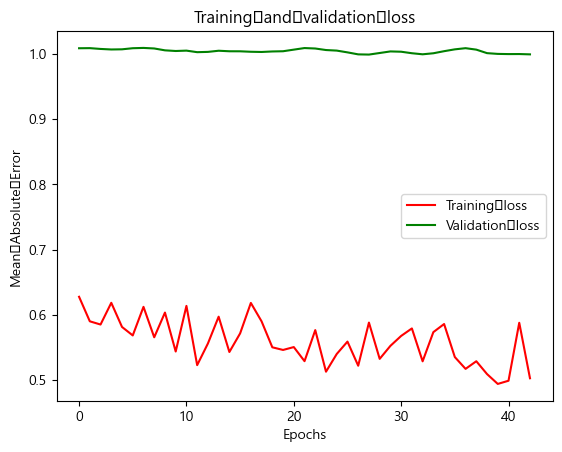

In [76]:
loss	=	history.history['loss']
val_loss	=	history.history['val_loss']
epoch	=	history.epoch
plt.figure()
plt.plot(epoch,	loss,	'r',	label='Training	loss')
plt.plot(epoch,	val_loss,	'g',	label='Validation	loss')
plt.title('Training	and	validation	loss')
plt.xlabel('Epochs')
plt.ylabel('Mean	Absolute	Error')
plt.legend()
plt.show()

In [77]:
from tensorflow.keras.models import	load_model
from os	import listdir
path = listdir('./model/')[-1]
best_model = load_model('./model/'+path)	

In [78]:
best_model.evaluate(X_test_94, y_test_94)

1/1 [==============================] - 47s 47s/step - loss: 0.9803


0.980256199836731

In [79]:
# 이 모델은 테스트 데이터에서 평균적으로 약 1.18만큼의 오차를 냈다는 뜻
# MAE이기 때문에 예측값과 실제값의 차이의 평균
# 예를 들어 : 실제값이 10이고 예측값이 8.5라면 -> 오차 =1.5

In [80]:
# 예측값확인
y_pred_94 = best_model.predict(X_test_94)
y_pred_94

1/1 [==============================] - 0s 418ms/step


array([[ 0.2163135 ],
       [ 0.17440577],
       [ 0.14200874],
       [-0.06800643],
       [-0.16889669],
       [-0.06643809],
       [ 0.06244086],
       [ 0.251044  ],
       [ 0.12815066]], dtype=float32)

In [81]:
# 예측값을 기존의 값 범위로 복원
y_pred_94_inv = yscaler_94.inverse_transform(y_pred_94) #모델이예측한값
y_test_94_inv = yscaler_94.inverse_transform(y_test_94) #실제 정답

In [82]:
y_pred_94_inv

array([[41.674553],
       [41.41471 ],
       [41.213837],
       [39.91167 ],
       [39.286114],
       [39.921394],
       [40.72049 ],
       [41.889896],
       [41.127914]], dtype=float32)

In [83]:
y_test_94_inv

array([[35.],
       [35.],
       [38.],
       [45.],
       [45.],
       [47.],
       [45.],
       [45.],
       [28.]])

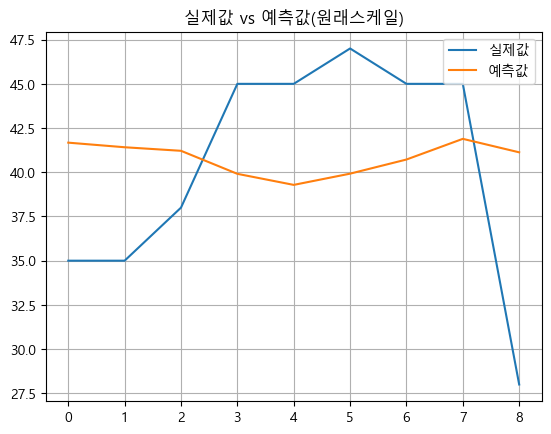

In [84]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(y_test_94_inv, label='실제값')
plt.plot(y_pred_94_inv, label='예측값')
plt.legend()
plt.title("실제값 vs 예측값(원래스케일)")
plt.grid(True)
plt.show()

In [85]:
# 최종성능확인
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_94_inv, y_pred_94_inv)

6.077938927544488

In [86]:
# 모델이 평균적으로 약 5.58만큼 예측을 틀렸다
# 예를 들어 어떤 날의 실제 발주 수량이 52, 모델은 49로 예측 -> 오차는 3
# 이런 식의 오차들이 여러개 있고, 그 오차들의 절댓값 평균이 4.69라는 뜻

## 추가정보를 포함한 모델 구축, 학습 및 평가

In [87]:
df_95.columns


Index(['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량',
       'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량',
       'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량',
       'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량',
       'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)',
       'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2',
       'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5',
       'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8',
       'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)',
       'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2',
       'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4',
       'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6',
       'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8',
       'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)',
       'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(

In [88]:
data_95	= df_95.loc[:,['Part Number','D일 투입예정 수량(D일계획)','D+1일 투입예정 수량(Total)',
                    'D+2일 투입예정 수량(Total)','D+3일 투입예정 수량(Total)','D+4일 투입예정 수량(Total)',	
                    'D+5일 투입예정 수량','D+6일 투입예정 수량','D+7일 투입예정 수량','D+8일 투입예정 수량',
                    'D+9일 투입예정 수량','D+10일 투입예정 수량','D+11일 투입예정 수량','D+12일 투입예정 수량',
                    'CRET_TIME']]
data_95['CRET_TIME'] = pd.to_datetime(data_95['CRET_TIME'], format="%Y%m%d%H%M")
data_95	=	data_95.groupby(by=[data_95['CRET_TIME'].dt.year,
data_95['CRET_TIME'].dt.month,
data_95['CRET_TIME'].dt.day]).last()
# 인덱스 넘버 리셋
data_95.reset_index(drop=True,	inplace=True)
# data95에 필요한 데이터만 따로 떼어주기
data_95	= data_95.loc[:,['D일 투입예정 수량(D일계획)','D+3일 투입예정 수량(Total)','D+4일 투입예정 수량(Total)','D+5일 투입예정 수량']].reset_index(drop=True)
X_95,y_95=to_timeseries_data(data_95)
X_train_95,	X_val_95,X_test_95 = np.split(X_95,[int(0.7*len(X_95)),int(0.8*len(X_95))])
# 평균화 훈련
Xscaler_95 = StandardScaler()
X_train_95 = Xscaler_95.fit_transform(X_train_95.reshape(-1, X_train_95.shape[-1])).reshape(X_train_95.shape)
X_val_95 = Xscaler_95.transform(X_val_95.reshape(-1, X_val_95.shape[-1])).reshape(X_val_95.shape)
X_test_95 = Xscaler_95.transform(X_test_95.reshape(-1, X_test_95.shape[-1])).reshape(X_test_95.shape)

In [89]:
X_95

array([[[113., 274., 270., 251.],
        [209., 276., 280., 193.],
        [209., 267., 340., 331.]],

       [[209., 276., 280., 193.],
        [209., 267., 340., 331.],
        [288., 282., 241., 267.]],

       [[209., 267., 340., 331.],
        [288., 282., 241., 267.],
        [276., 320., 241., 354.]],

       [[288., 282., 241., 267.],
        [276., 320., 241., 354.],
        [276., 301., 222., 300.]],

       [[276., 320., 241., 354.],
        [276., 301., 222., 300.],
        [276., 349., 298., 345.]],

       [[276., 301., 222., 300.],
        [276., 349., 298., 345.],
        [276., 369., 250., 363.]],

       [[276., 349., 298., 345.],
        [276., 369., 250., 363.],
        [276., 358., 182., 314.]],

       [[276., 369., 250., 363.],
        [276., 358., 182., 314.],
        [276., 284., 345., 254.]],

       [[276., 358., 182., 314.],
        [276., 284., 345., 254.],
        [276., 281., 262., 257.]],

       [[276., 284., 345., 254.],
        [276., 281., 262., 257

In [90]:
y_95

array([276., 276., 276., 276., 276., 276., 276., 276., 276., 262., 305.,
       309., 338., 323., 305., 305., 269., 311., 335., 327., 236., 236.,
       236., 236., 303., 276., 352., 363., 365., 365., 344., 317., 209.,
       250., 325., 325., 325., 290., 249.,  99., 276., 264., 264., 209.])

In [91]:
# 추가 부품 형태 확인
print("X학습:{}, X검증:{}, X평가:{}".format(X_train_95.shape,X_val_95.shape,X_test_95.shape))

X학습:(30, 3, 4), X검증:(5, 3, 4), X평가:(9, 3, 4)


In [92]:
# 추가 부품에 대한 데이터 셋 저장 및 분리
X_train_both = np.concatenate([X_train_94, X_train_95], axis=2)
X_val_both = np.concatenate([X_val_94, X_val_95], axis=2)
X_test_both = np.concatenate([X_test_94, X_test_95], axis=2)

print("X학습:{}, X검증:{}, X평가:{}".format(X_train_both.shape, X_val_both.shape, X_test_both.shape))

# X_train_both.shape = (30,3,4)
# axis=0, 샘플 수 (배치크기), 30
# axis=1, 시계열 길이 (타임스텝), 3
# axis=2, 피처 수 (입력 변수 수), 4
# => (30, 3, 4) + (30, 3, 4) -> (30, 3, 8)

X학습:(30, 3, 8), X검증:(5, 3, 8), X평가:(9, 3, 8)


In [93]:
X_train_both[0][0]

array([-0.06064984, -1.01399333, -1.35017379, -0.00812214, -4.4128268 ,
       -0.53748561, -0.21612782, -0.71418582])

In [94]:
X_train_94[0][0]

array([-0.06064984, -1.01399333, -1.35017379, -0.00812214])

In [95]:
X_train_95[0][0]

array([-4.4128268 , -0.53748561, -0.21612782, -0.71418582])

In [96]:
# 분석모델 구축
model = Sequential()
model.add(LSTM(32,dropout=0.2, activation='relu', input_shape=(3,8), return_sequences=True))
model.add(LSTM(16, dropout=0.2, activation='relu'))
model.add(Dense(1, activation="linear"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 32)             5248      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8401 (32.82 KB)
Trainable params: 8401 (32.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
#Params =(input_dim + units + 1) * units * 4
# lstm_16 : (8+32+1)*32*4 = 5248
# (32+16+1)*16*4 = 3136
# (16+1)*1 = 17

In [98]:
model.compile(optimizer='adam', loss='mae')

In [99]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

os.makedirs('./new_model', exist_ok=True)
model_path = './new_model/{epoch:02d}-{val_loss:.4f}.keras'
callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             ModelCheckpoint(filepath=model_path, monitor='val_loss',
                             verbose=0, save_best_only=True)]


history = model.fit(X_train_both, y_train_94, epochs=100, batch_size=4, 
                    validation_data = (X_val_both, y_val_94),
                    callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - 4s 71ms/step - loss: 0.7808 - val_loss: 0.9258
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.7752 - val_loss: 0.9193
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7618 - val_loss: 0.9110
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7495 - val_loss: 0.9035
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7370 - val_loss: 0.8927
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7128 - val_loss: 0.8782
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6619 - val_loss: 0.8641
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6374 - val_loss: 0.8587
Epoch 9/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5639 - val_loss: 0.8385
Epoch 10/100
8/8 [==============================] - 0s 22ms/step - loss: 0.5382 - val_loss: 0.8272
Epoch 11/100
8/8 [=

In [100]:
# 8/8 [==============================] - 0s 9ms/step - loss: 0.6616 - val_loss: 0.9776

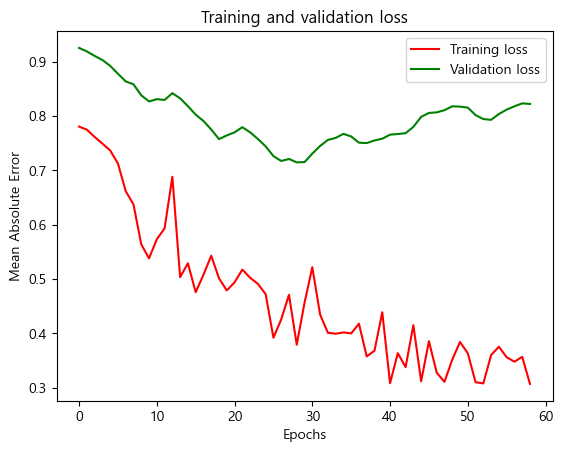

In [101]:
#검증 손실값을 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = history.epoch

plt.figure()
plt.plot(epoch, loss, 'r', label='Training loss')
plt.plot(epoch, val_loss, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [102]:
from tensorflow.keras.models import load_model
from os import listdir
path = listdir("./new_model/")[-1]
best_model = load_model("./new_model/"+path)

In [103]:
best_model.evaluate(X_test_both, y_test_94)

1/1 [==============================] - 0s 464ms/step - loss: 0.7198


0.719765305519104

In [104]:
# 0.9002685546875 위에서나온값

In [105]:
y_pred_94 = best_model.predict(X_test_both)
y_pred_94

1/1 [==============================] - 0s 375ms/step


array([[0.13405739],
       [0.23024207],
       [0.5785456 ],
       [0.53669435],
       [0.94292873],
       [0.99438393],
       [0.88329476],
       [0.8248415 ],
       [0.7593534 ]], dtype=float32)

In [106]:
y_pred_94_inv = yscaler_94.inverse_transform(y_pred_94)
y_test_94_inv = yscaler_94.inverse_transform(y_test_94)

In [107]:
y_pred_94_inv

array([[41.164536],
       [41.760918],
       [43.920525],
       [43.66103 ],
       [46.17983 ],
       [46.49887 ],
       [45.810078],
       [45.447647],
       [45.041595]], dtype=float32)

In [108]:
y_test_94_inv

array([[35.],
       [35.],
       [38.],
       [45.],
       [45.],
       [47.],
       [45.],
       [45.],
       [28.]])

In [109]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_94_inv, y_pred_94_inv)

4.462802886962891

In [110]:
# 전의값 5.581988016764323

### 분석결과에 대한 논의 및 해석

| 예측 성능             | 부품 94의 발주데이터만 사용 | 부품 94, 95의 발주데이터 모두 사용 |
|----------------------|-------------------------|--------------------------------|
| MAE Loss             |  0.9002685546875        | 0.8562828898429871             |
| MAE (inverse scaling)|  5.581988016764323      | 5.309260474310981              |

MAE Loss 테스트 데이터에서 평균적으로 약 1.16만큼의 오차를 냈다는 뜻
MAE(inverse scaling) 모델이 평균적으로 약 5.26만큼 예측을 틀렸다.

동일한 제품 생산에 사용된 부품들이 서로 발주 수량에 연관이 있을 것이라는 가정
('corr()'메서드 등을 활용하여 수치적으로 부품간의 상호연관성을 파악할 수 있다.)
수집된 데이터가 많을 수록 정확한 예측 모델을 구축할 수 있다.


### 분석 결과 활용 가이드

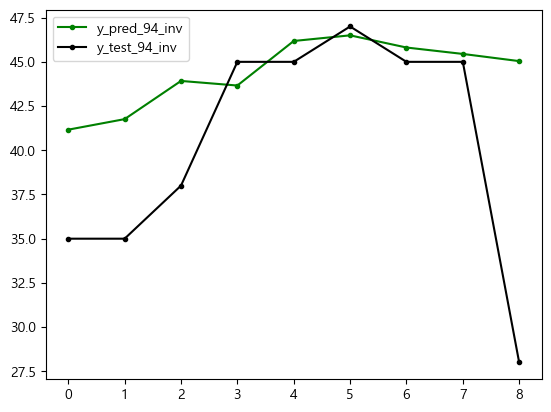

In [111]:
# 도출한 예측값pred과 실제값test을 시각화
plt.plot(y_pred_94_inv, 'g.-', label="y_pred_94_inv")
plt.plot(y_test_94_inv, 'k.-', label="y_test_94_inv")
plt.legend()
plt.show()

# 최종 예측 성능은 MAE 기준 약 5이므로
# 예측 수량보다 5개 이상의 재고를 VMI 적차장에서 보유하고 있는 것이 적절하다는 것을 알 수 있다.

In [112]:
# 사용자 입력 -> spring controller (http post요청)-> flask서버(예측모델)(예측결과 반환) -> Spring View 결과 표시